# Practice Problem 4
### Problem: Find and compare the GDP of the 10 most populous countries in 2007.
Use plt.hist() and plt.subplots().

NOTE: We saw an example of plt.subplots() in ***Finding Distribution of Data with Histograms.***

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("countries.csv")
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
data_2007 = data[data.year==2007]
data_2007["GDP"] = data.population * data.gdpPerCapita

<ipython-input-3-07cc01b476a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2007["GDP"] = data.population * data.gdpPerCapita


In [4]:
data_2007.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita,GDP
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,3.107929e+10
23,Albania,Europe,2007,76.423,3600523,5937.029526,2.137641e+10
35,Algeria,Africa,2007,72.301,33333216,6223.367465,2.074449e+11
47,Angola,Africa,2007,42.731,12420476,4797.231267,5.958390e+10
59,Argentina,Americas,2007,75.320,40301927,12779.379640,5.150336e+11


In [5]:
top10_countries=data_2007.sort_values("population", ascending=False).head(10)

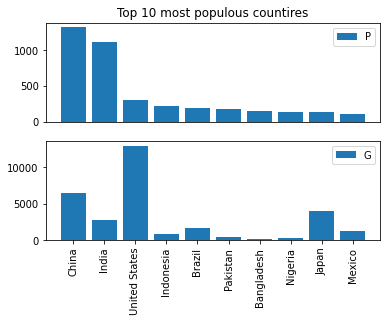

In [16]:
x=range(10)
plt.subplot(211)
plt.bar(x,top10_countries.population/10**6)
plt.title("Top 10 most populous countires")
plt.legend("Population in Millions")
plt.xticks([],[])
plt.subplot(2,1,2)
plt.bar(x,top10_countries.GDP/10**9)
plt.xticks(x,top10_countries.country,rotation="vertical")
plt.legend("GDP in Billions")
plt.show()

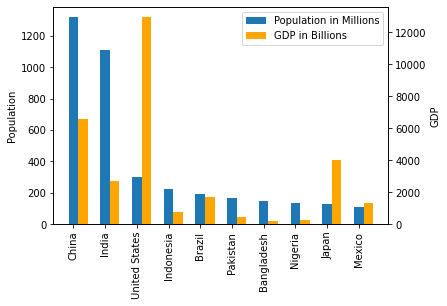

In [21]:
#Alternate method

import numpy as np # We're going to import np for np.arange().
# np.arange(10) is similar to range(10), and it allows us to shift
# each value in it by the bar width as you can see below.
x = np.arange(10)

# We need to create subplots in order to overlay two bar plots
# with proper axes on the left hand side and the right hand side.
fig, ax1 = plt.subplots()

width = 0.3 # This is the width of each bar in the bar plot.
plt.xticks(x, top10_countries.country, rotation='vertical')
population = ax1.bar(x, top10_countries.population / 10**6, width)
plt.ylabel('Population')

# ax1.twinx() gives us the same x-axis with the y-axis on the right.
ax2 = ax1.twinx()
gdp = ax2.bar(x + width, top10_countries.GDP/ 10**9,
              width, color='orange')
plt.ylabel('GDP')
plt.legend([population, gdp],
           ['Population in Millions', 'GDP in Billions'])
figure = plt.gcf() # get current figure
plt.show()